In [12]:
#import dependencies 
import pandas as pd
import requests 
import random
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from citipy import citipy

#import 
from api_keys import weather_api_key as api_key

#create output data file
output_data_file = "output_data/cities.csv"

In [16]:
# List for holding lat_lngs and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lat, long)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

In [17]:
print(cities)

['butaritari', 'novo oriente', 'busselton', 'ilulissat', 'bredasdorp', 'dingle', 'port elizabeth', 'illoqqortoormiut', 'albany', 'cherskiy', 'tommot', 'mar del plata', 'victoria', 'hobart', 'ushuaia', 'lagoa', 'belyy yar', 'tual', 'salalah', 'la ronge', 'east london', 'moron', 'verkhnyaya inta', 'rikitea', 'gaborone', 'omsukchan', 'ponta do sol', 'sambava', 'meulaboh', 'punta arenas', 'taolanaro', 'mataura', 'tuktoyaktuk', 'kapaa', 'torbay', 'bluff', 'okha', 'ilheus', 'barrow', 'poum', 'kungurtug', 'mbandaka', 'necochea', 'katherine', 'longyearbyen', 'shelburne', 'mao', 'thompson', 'port lincoln', 'vanimo', 'fort nelson', 'tuatapere', 'dikson', 'falam', 'lazaro cardenas', 'monaragala', 'atuona', 'vaitupu', 'talnakh', 'arraial do cabo', 'huarmey', 'bethel', 'nikolskoye', 'boyolangu', 'bhadrachalam', 'colac', 'polyarnyy', 'itaituba', 'provideniya', 'urdoma', 'airai', 'coquimbo', 'chokurdakh', 'kodiak', 'meyungs', 'vsevolodo-vilva', 'tsihombe', 'marienburg', 'marsa matruh', 'georgetown', 

In [18]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        record += 1
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found.')
    continue

Beginning Data Retrieval
-------------------------
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City 

City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not

In [19]:
#API calls

# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
weather_df = pd.DataFrame(weatherdata)
#output to csv
weather_df.to_csv('weatherdata.csv')

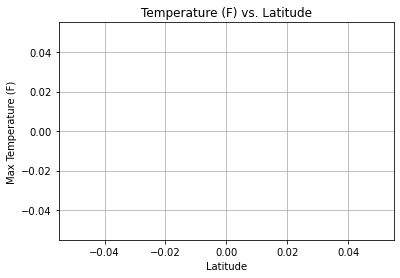

In [20]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(weather_df['Lat'], weather_df['Max Temperature'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('Temperature (F) vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Max_Temp_vs_Lat.png')
plt.show()

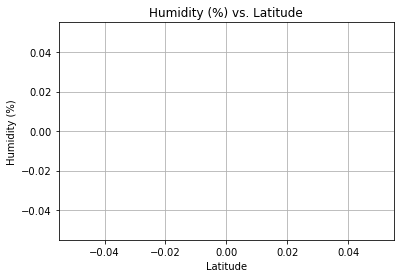

In [21]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Humidity_vs_Lat.png')

plt.show()

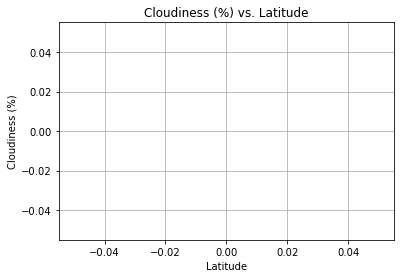

In [22]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Cloudiness_vs_Lat.png')
plt.show()

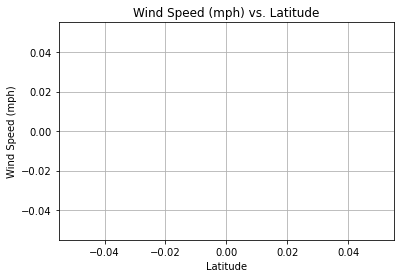

In [23]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', s=20, c='black', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Windspeed_vs_Lat.png')
plt.show()

In [24]:
#import additional dependencies

from scipy.stats import linregress
from pprint import pprint

In [25]:
northern = weather_df.loc[weather_df["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [26]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"fig{ifig}.png")
    plt.show()

In [27]:
# Northern Hemisphere - Temperature (F) vs. Latitude

xlbl = "Lat"
ylbl = "Max Temperature"
lblpos = (40,80)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

ValueError: Inputs must not be empty.

In [28]:
# Southern Hemisphere - Temperature (F) vs. Latitude

xlbl = "Lat"
ylbl = "Max Temperature"
lblpos = (-25,45)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

ValueError: Inputs must not be empty.

In [29]:
# Northern Hemisphere - Humidity (%) vs. Latitude

xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,20)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

ValueError: Inputs must not be empty.

In [30]:
# Southern Hemisphere - Humidity (%) vs. Latitude

xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-56,18)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)

ValueError: Inputs must not be empty.

In [31]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (40,30)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,10)

ValueError: Inputs must not be empty.

In [32]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,20)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

ValueError: Inputs must not be empty.

In [33]:

# Northern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,11)

ValueError: Inputs must not be empty.

In [34]:

# Southern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Lat"
ylbl = "Wind Speed"
title = 'Southern Hemisphere - Wind Speed (mph) vs. Latitude'
lblpos = (-25,23)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)

ValueError: Inputs must not be empty.